In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="uyrjZfBU0BCp1BKy1wcq")
project = rf.workspace("leo-ueno").project("people-detection-o4rdr")
version = project.version(9)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 119.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 117.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to People-Detection-9 in yolov8:: 100%|██████████| 34814/34814 [00:15<00:00, 2237.52it/s]


In [5]:
!pip install ultralytics


  Using cached ultralytics-8.3.165-py3-none-any.whl.metadata (37 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.

In [6]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # You can also use yolov8s.pt, yolov8m.pt, etc.


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 193MB/s]


In [7]:
model.train(
    data=dataset.location + "/data.yaml",
    epochs=5,      # ⬅️ Reduced from 50 to 5
    imgsz=416,     # ⬅️ Smaller image size = faster
    batch=8        # ⬅️ Smaller batch for low memory
)


Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/People-Detection-9/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pre

100%|██████████| 755k/755k [00:00<00:00, 84.2MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 308MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.1 ms, read: 41.6±13.5 MB/s, size: 185.8 KB)


train: Scanning /content/People-Detection-9/train/labels... 15210 images, 1932 backgrounds, 0 corrupt: 100%|██████████| 15210/15210 [00:24<00:00, 611.74it/s]

train: /content/People-Detection-9/train/images/2007_000187_jpg.rf.6072bb3923494a7afb8648ba483324fd.jpg: 23 duplicate labels removed
train: /content/People-Detection-9/train/images/2007_000999_jpg.rf.6c08f70e15d4b331a62dd733f71a31ef.jpg: 7 duplicate labels removed
train: /content/People-Detection-9/train/images/2007_002260_jpg.rf.67b39e42171c963a3427b19a2abe68b4.jpg: 19 duplicate labels removed
train: /content/People-Detection-9/train/images/2008_003417_jpg.rf.f31d813882efbf61f9f5526453e177e3.jpg: 1 duplicate labels removed
train: /content/People-Detection-9/train/images/2008_003522_jpg.rf.0c7864f40841e847ba3fb26e08efd3e3.jpg: 1 duplicate labels removed
train: /content/People-Detection-9/train/images/2008_006554_jpg.rf.f803f4b634de852ff949e04c8e89ced5.jpg: 1 duplicate labels removed
train: /content/People-Detection-9/train/images/2009_002733_jpg.rf.a2dac53f2d02cd54c047dc7af456e088.jpg: 1 duplicate labels removed


train: New cache created: /content/People-Detection-9/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 280, len(boxes) = 100029. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 32.0±18.9 MB/s, size: 162.2 KB)


val: Scanning /content/People-Detection-9/valid/labels... 1431 images, 61 backgrounds, 0 corrupt: 100%|██████████| 1431/1431 [00:02<00:00, 689.26it/s]

val: /content/People-Detection-9/valid/images/GX010023_frame_00025_right_jpg.rf.3255febc597d78d5d6e4bde455ba7b2a.jpg: 23 duplicate labels removed
val: New cache created: /content/People-Detection-9/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 61, len(boxes) = 10660. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5     0.768G      1.638      1.581       1.31         29        416: 100%|██████████| 1902/1902 [04:35<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:14<00:00,  6.41it/s]


                   all       1431      10660      0.585      0.378      0.398      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      1.05G      1.623      1.449      1.306          8        416: 100%|██████████| 1902/1902 [04:19<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:11<00:00,  7.56it/s]


                   all       1431      10660      0.617      0.405      0.433      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      1.07G      1.559      1.384       1.28         13        416: 100%|██████████| 1902/1902 [04:17<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:11<00:00,  7.56it/s]


                   all       1431      10660      0.659      0.448      0.479      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      1.08G      1.493      1.294      1.243          8        416: 100%|██████████| 1902/1902 [04:13<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:12<00:00,  7.49it/s]


                   all       1431      10660      0.681      0.467      0.506      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5       1.1G      1.409      1.205      1.205         27        416: 100%|██████████| 1902/1902 [04:16<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:12<00:00,  7.48it/s]


                   all       1431      10660        0.7      0.478      0.537      0.289

5 epochs completed in 0.380 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:12<00:00,  6.98it/s]


                   all       1431      10660        0.7      0.477      0.537      0.289
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e25856f80d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [8]:
metrics = model.val()
#🔹 5. Evaluate the Model




Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1221.7±488.8 MB/s, size: 35.0 KB)


val: Scanning /content/People-Detection-9/valid/labels.cache... 1431 images, 61 backgrounds, 0 corrupt: 100%|██████████| 1431/1431 [00:00<?, ?it/s]

val: /content/People-Detection-9/valid/images/GX010023_frame_00025_right_jpg.rf.3255febc597d78d5d6e4bde455ba7b2a.jpg: 23 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 61, len(boxes) = 10660. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 179/179 [00:13<00:00, 12.81it/s]


                   all       1431      10660        0.7      0.479      0.537      0.289
Speed: 0.1ms preprocess, 2.9ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train2


In [9]:
#6. Predict on Test Images


results = model.predict(source=dataset.location + "/test/images", save=True)



image 1/760 /content/People-Detection-9/test/images/0000540_jpg.rf.d1b964542ac8df27835f1348ebcac01a.jpg: 320x416 2 persons, 40.5ms
image 2/760 /content/People-Detection-9/test/images/000054_r-2_jpg.rf.23723f3554a328733717247da135acc8.jpg: 320x416 2 persons, 7.2ms
image 3/760 /content/People-Detection-9/test/images/000070_jpg.rf.5898e9817249586892b429970c485b29.jpg: 256x416 47 persons, 35.4ms
image 4/760 /content/People-Detection-9/test/images/000071_jpg.rf.b134f02af03ac3e9ada819f9010aebce.jpg: 256x416 49 persons, 6.5ms
image 5/760 /content/People-Detection-9/test/images/000075_jpg.rf.81b226a4f4ca1e5463ba31e203c9a029.jpg: 256x416 49 persons, 7.0ms
image 6/760 /content/People-Detection-9/test/images/000077_jpg.rf.86614d2155ccf19053745e610adca4ab.jpg: 256x416 46 persons, 6.4ms
image 7/760 /content/People-Detection-9/test/images/000079_jpg.rf.1ec8b32716b68fc22ed1078a66ef611a.jpg: 256x416 46 persons, 7.3ms
image 8/760 /content/People-Detection-9/test/images/000086_jpg.rf.c7c347a594a03e3b0a

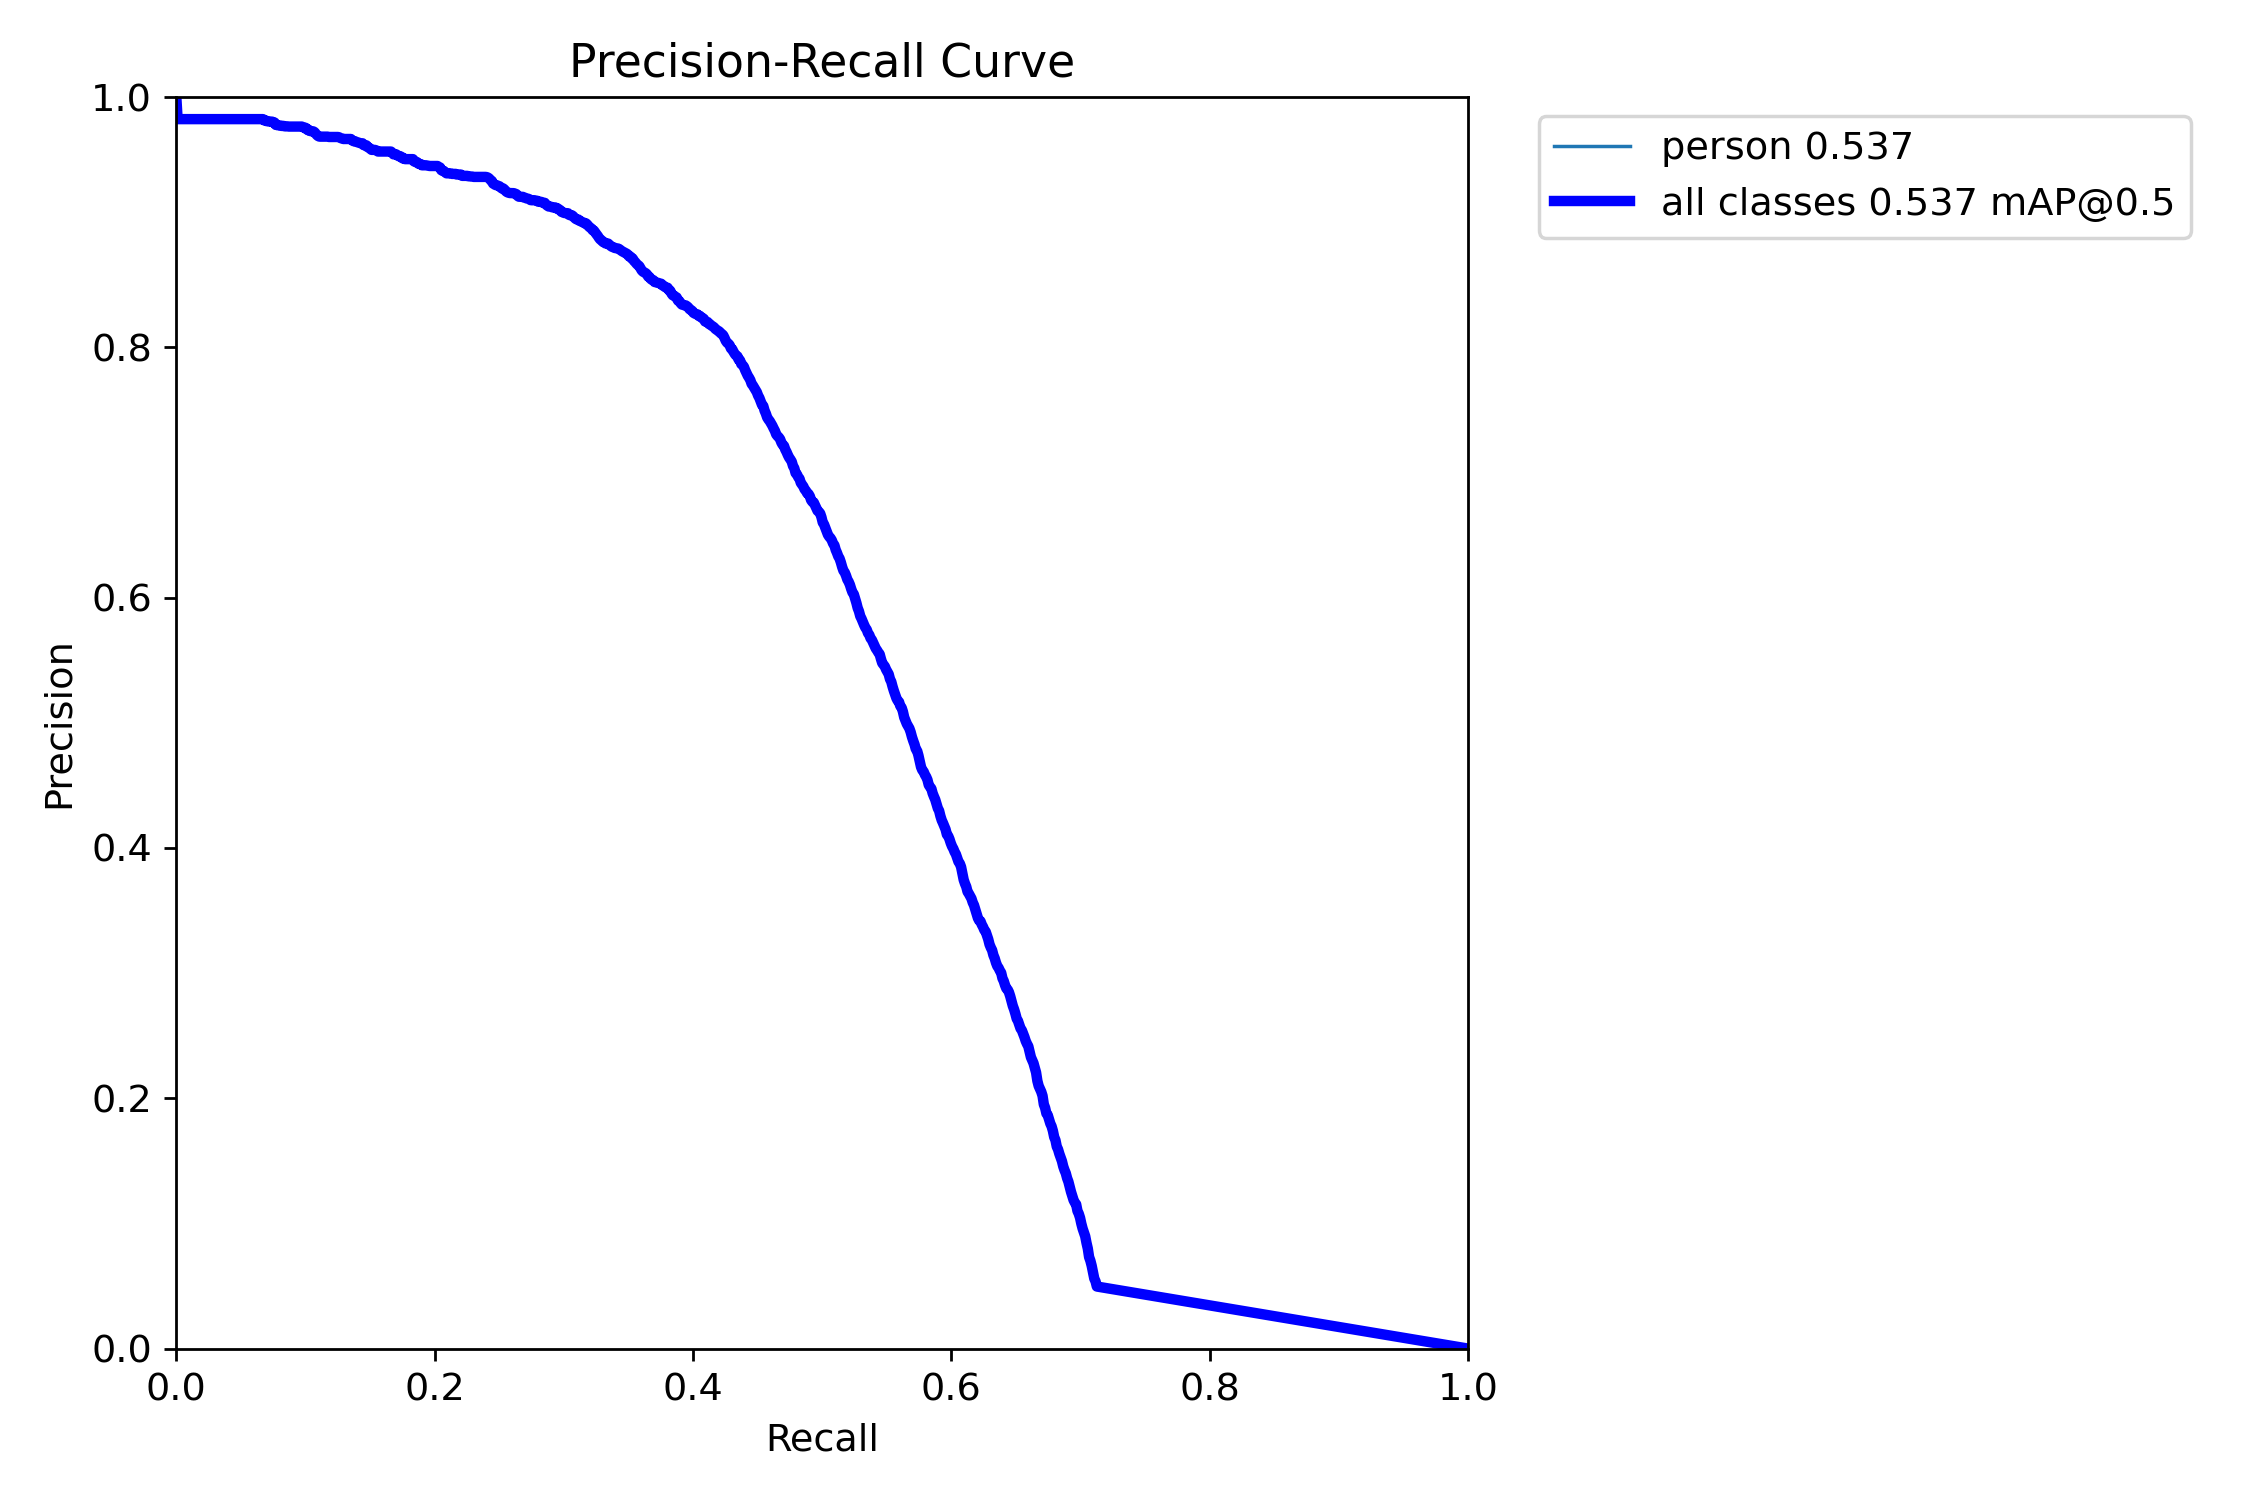

In [12]:
# 7. Display an Output Image
import os
from IPython.display import Image, display

output_dir = 'runs/detect/train2'
output_files = os.listdir(output_dir)
display(Image(filename=os.path.join(output_dir, output_files[0])))

In [13]:
print(metrics)


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e26774a5d90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

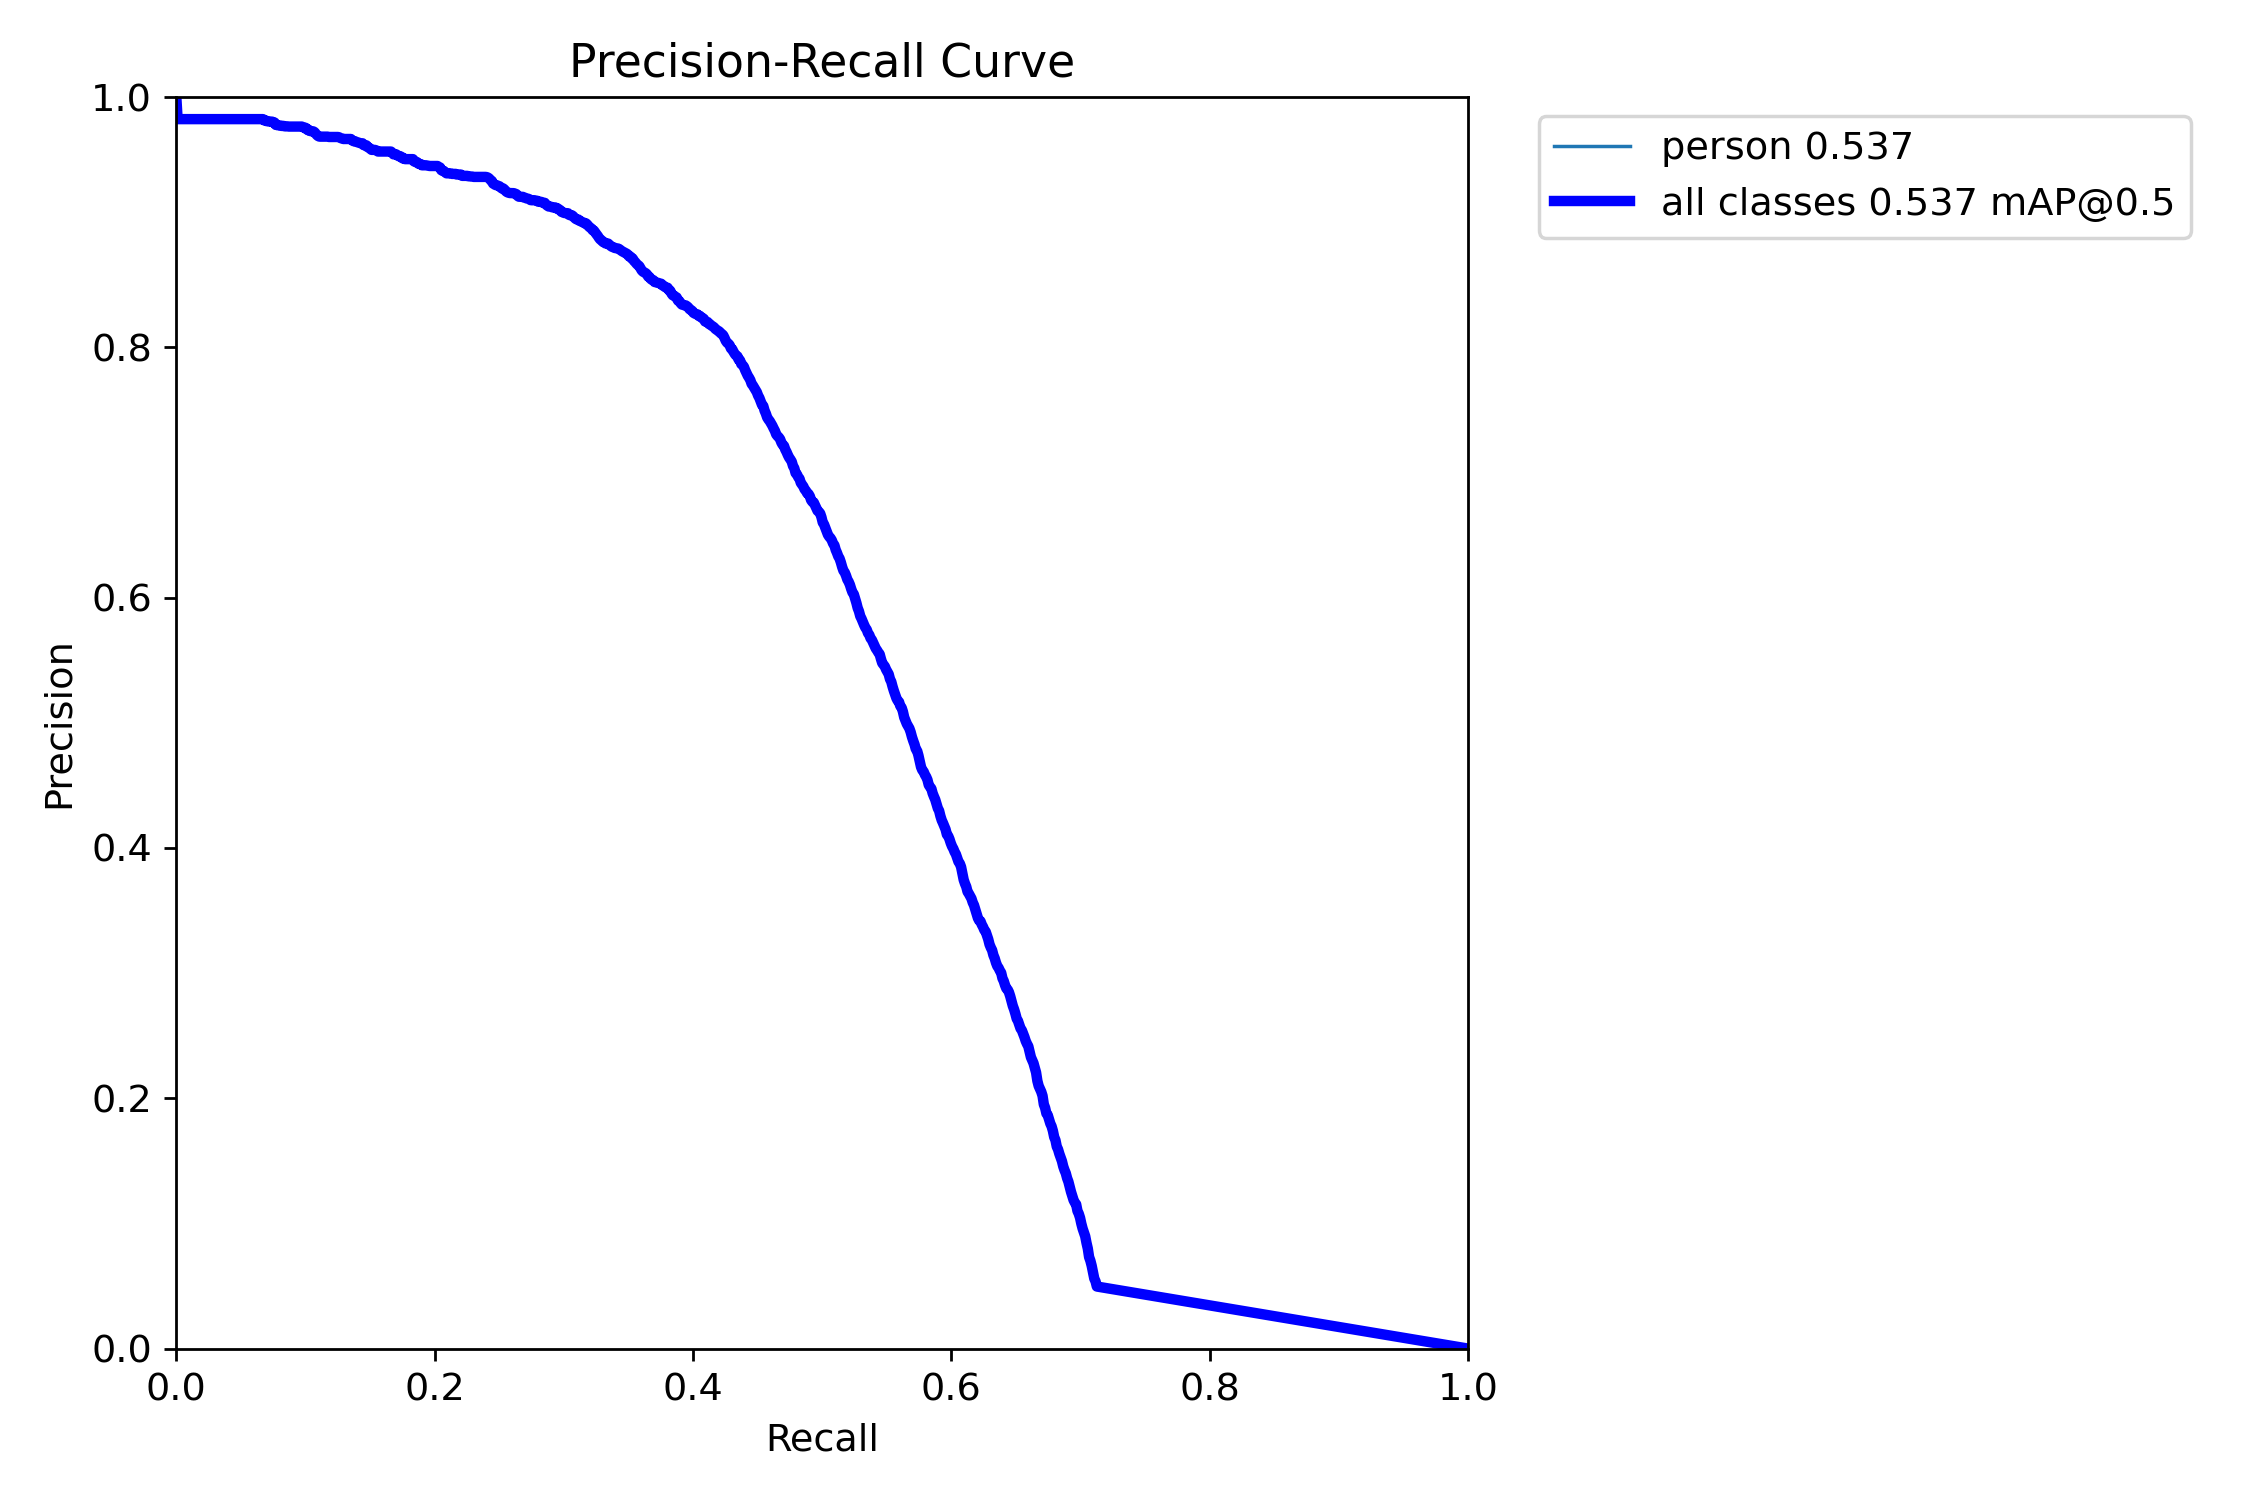

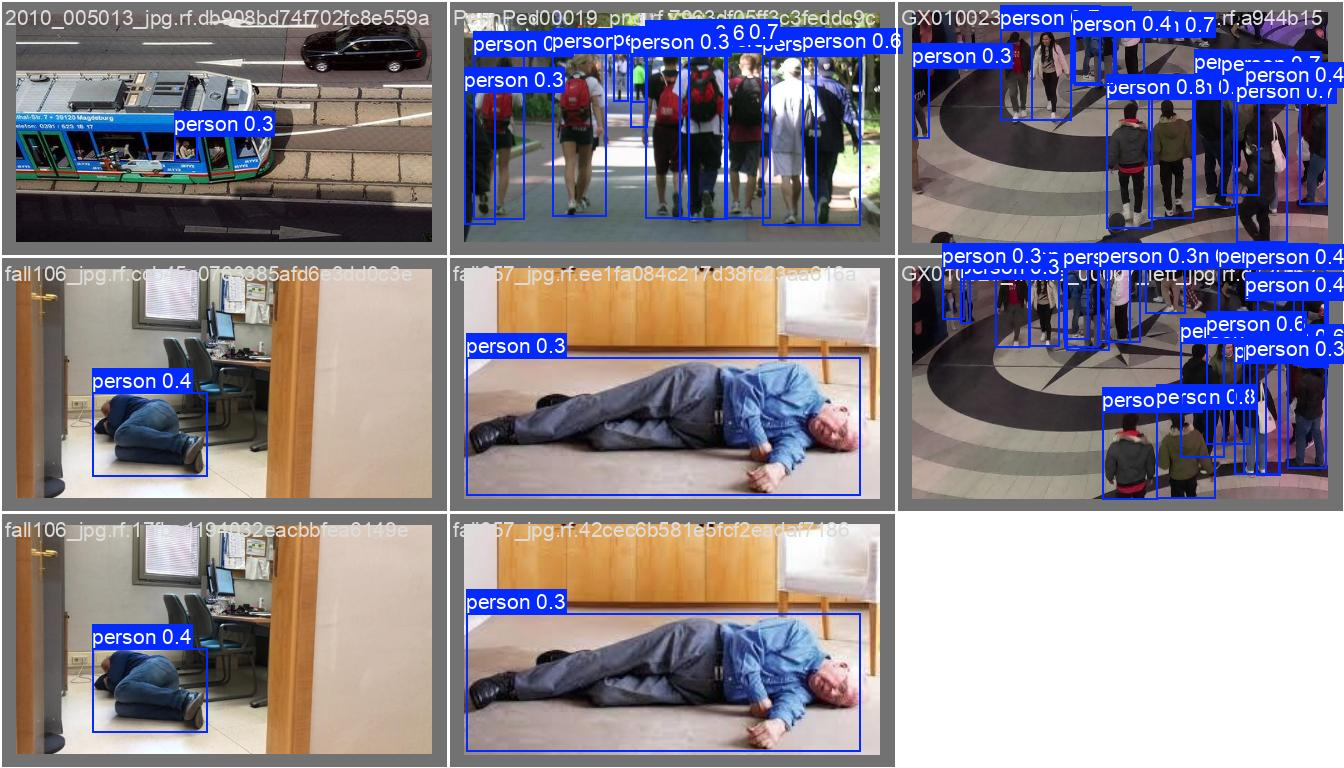

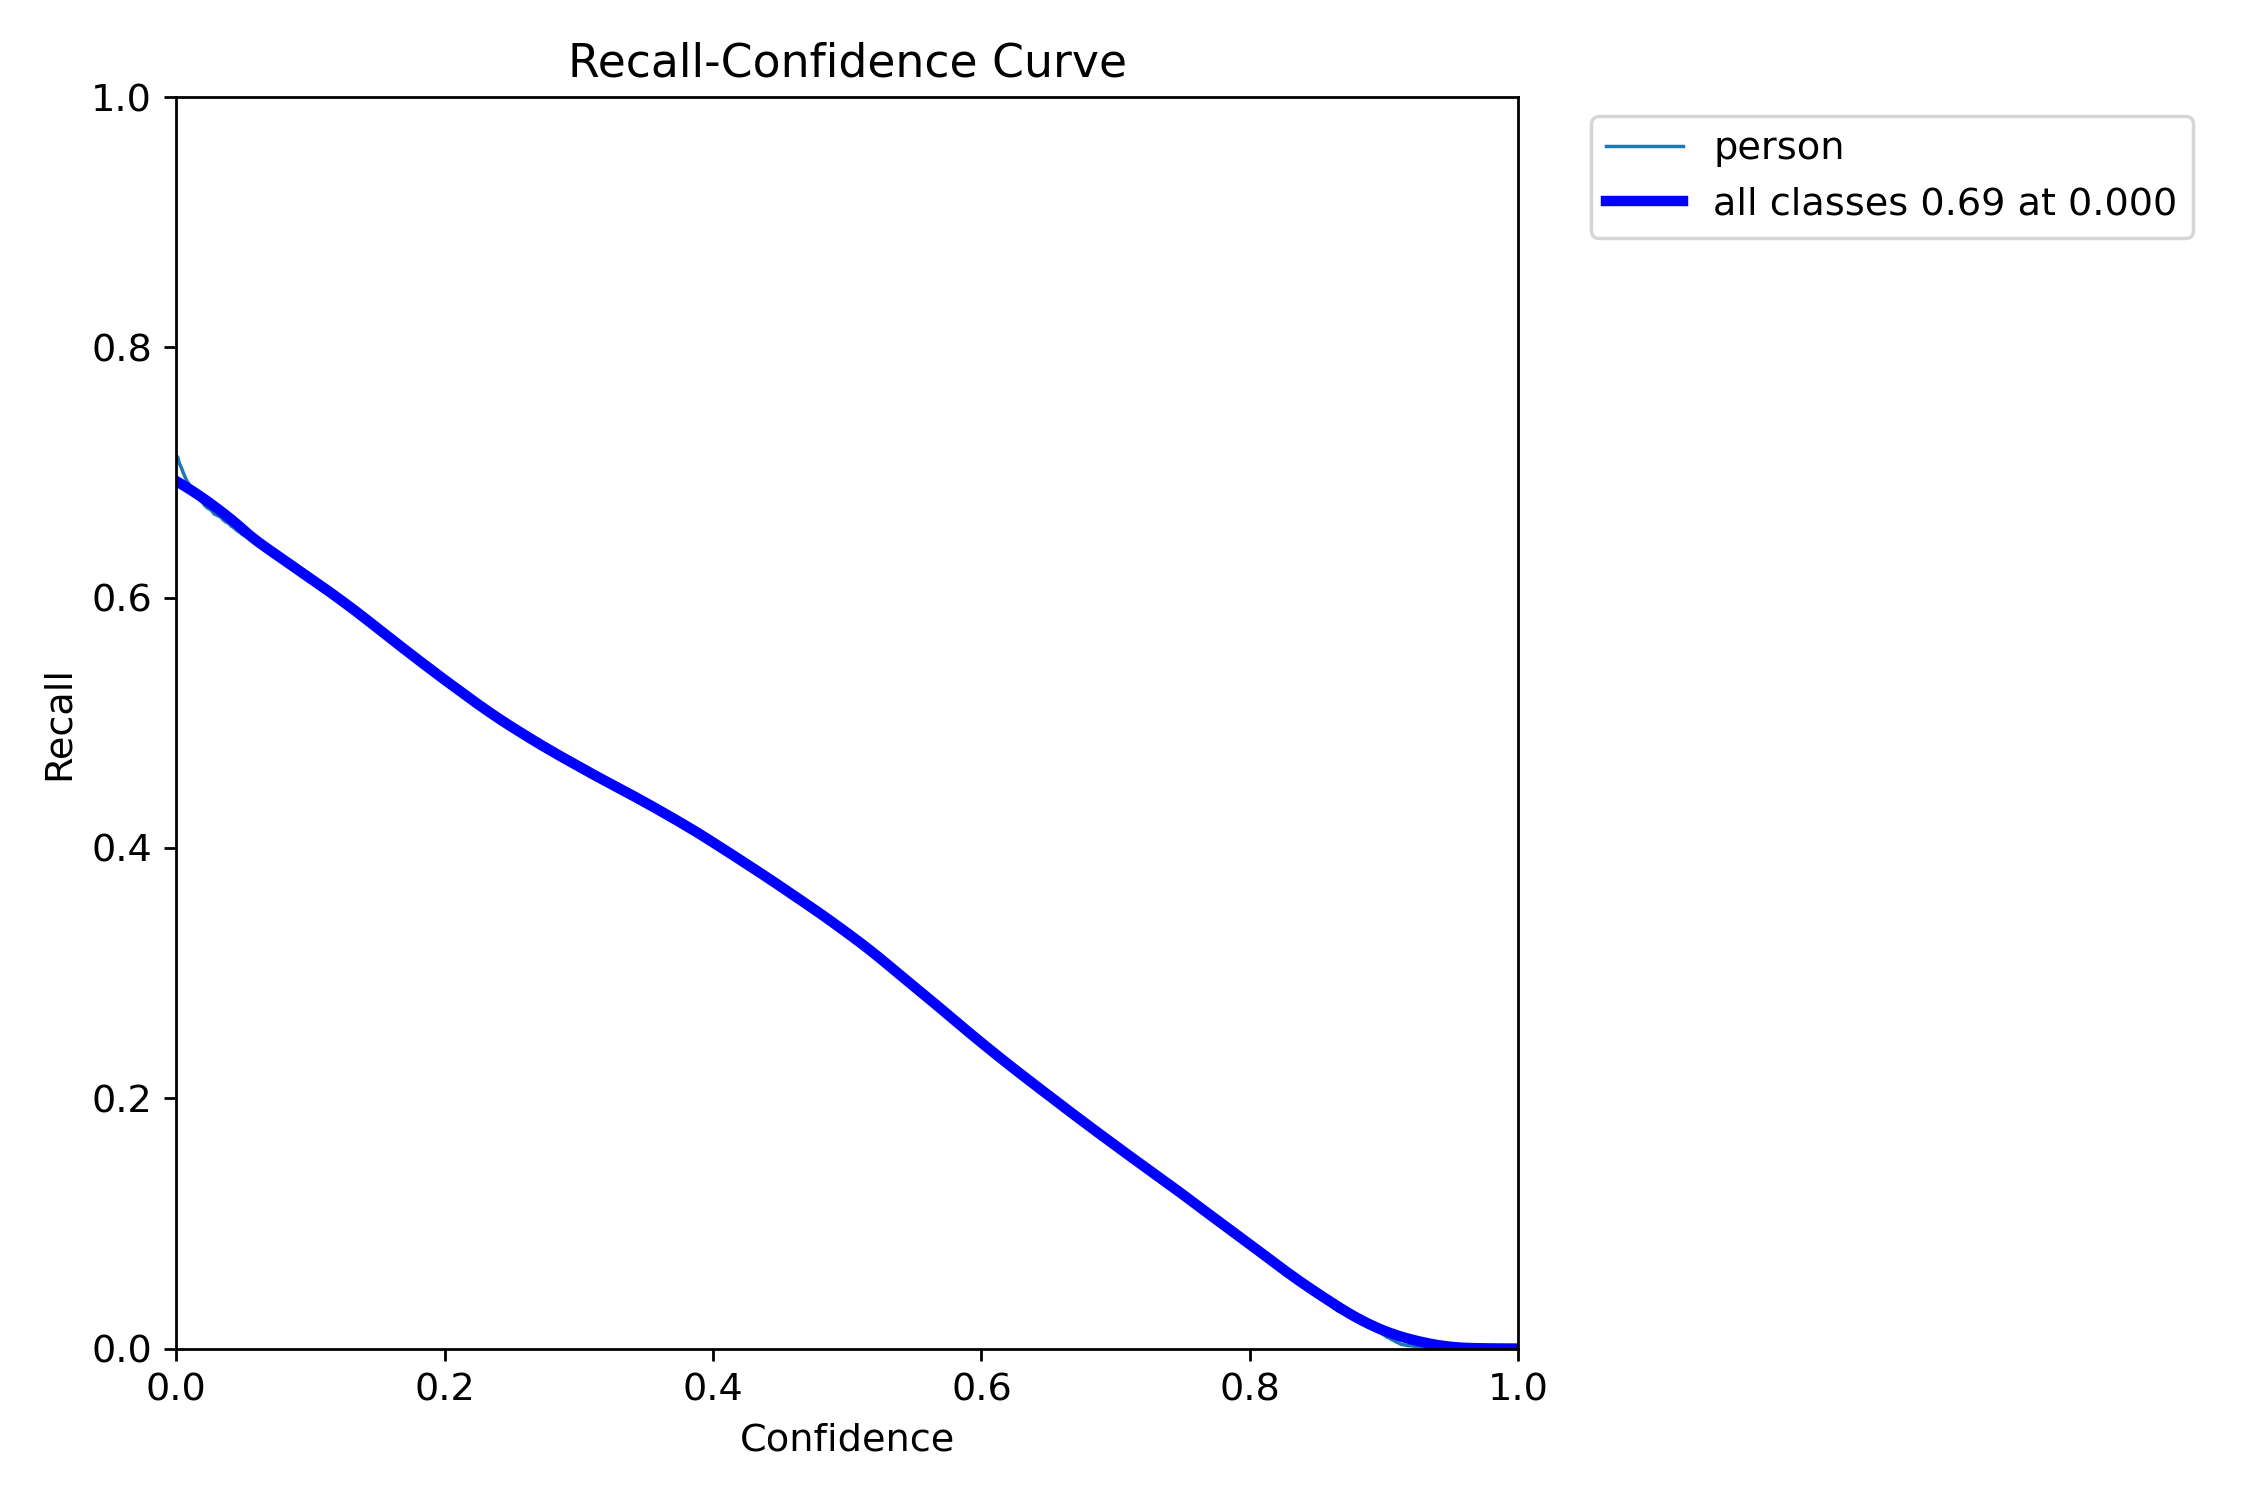

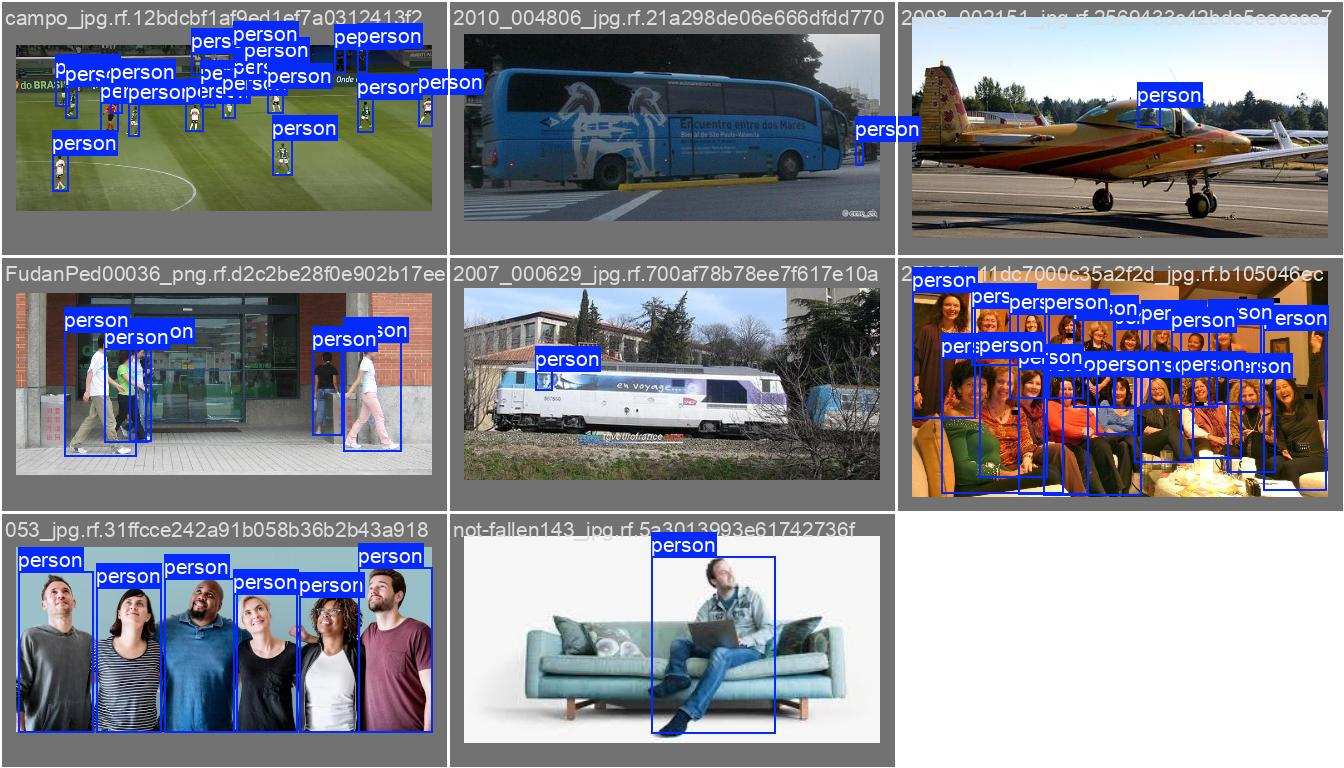

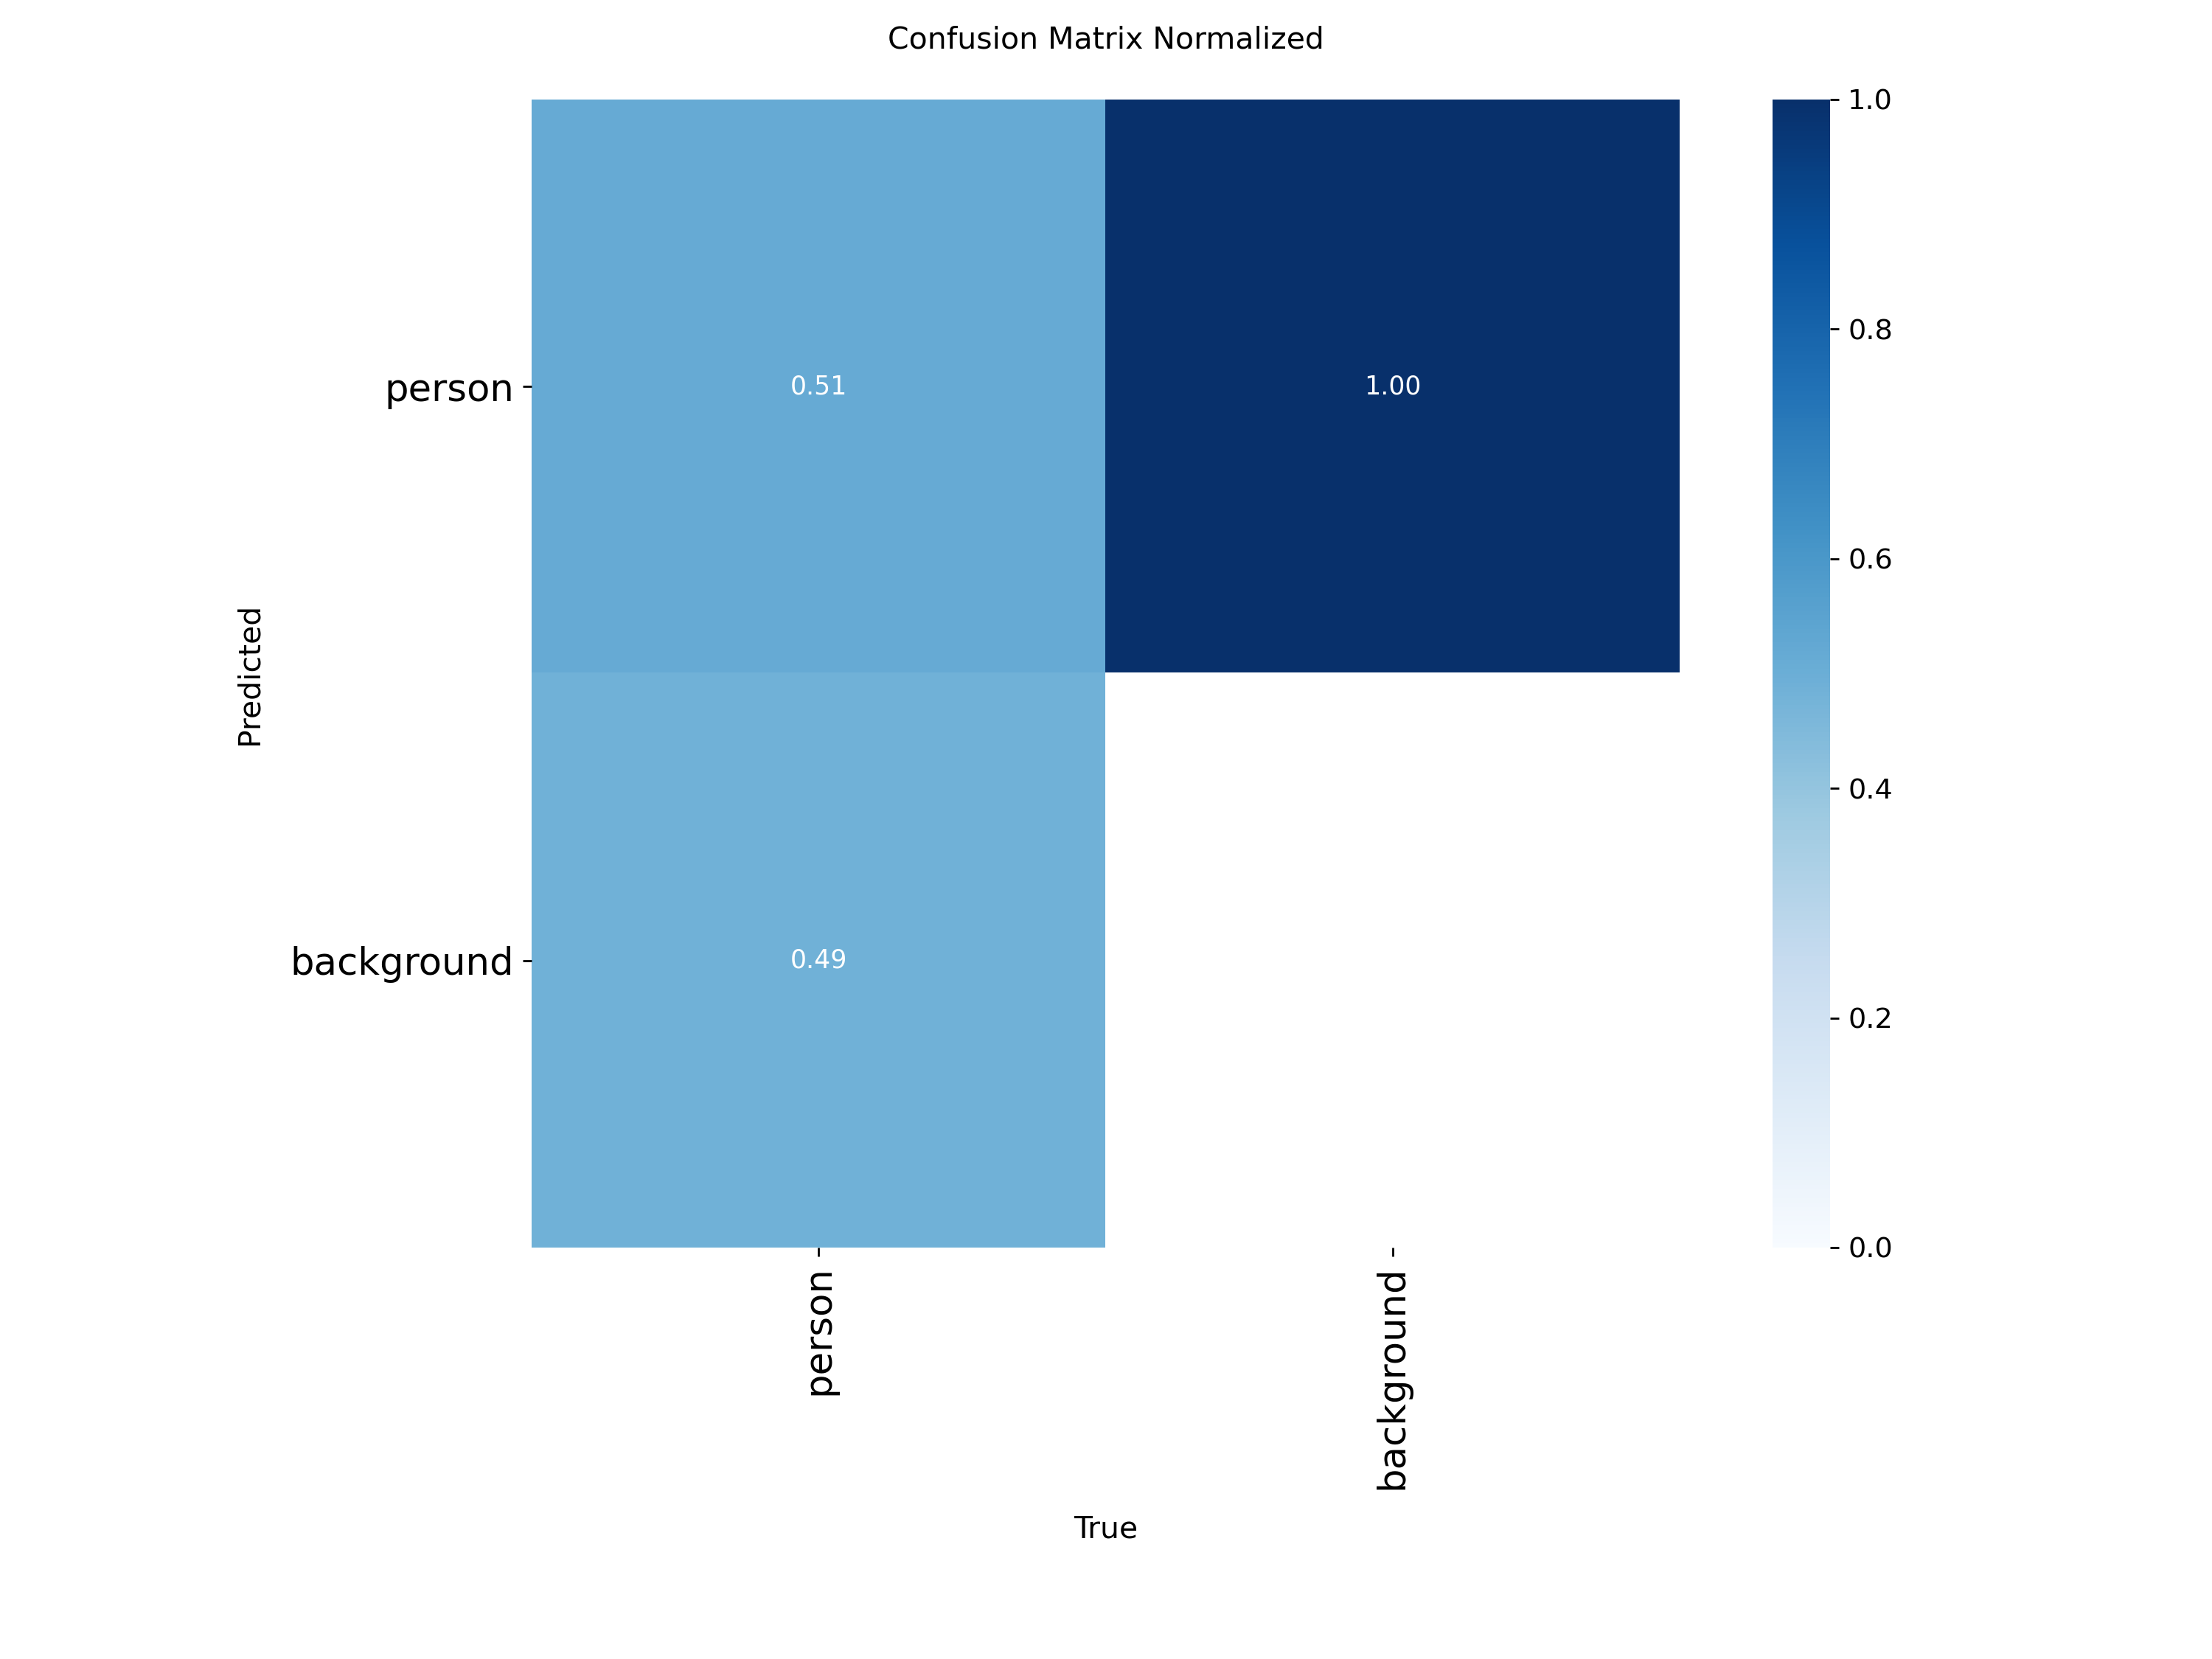

In [14]:
for file in output_files[:5]:
    display(Image(filename=os.path.join(output_dir, file)))


In [18]:
from google.colab import files

uploaded = files.upload()


Saving e.jpg to e.jpg



image 1/1 /content/e.jpg: 416x288 1 person, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 288)
Results saved to runs/detect/train4


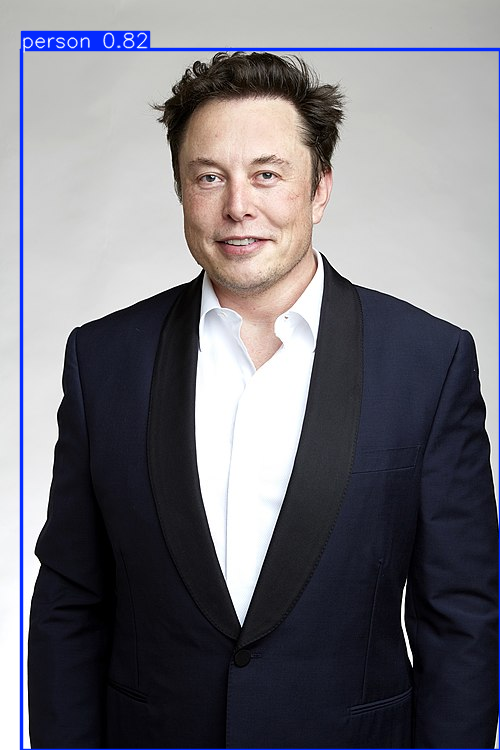

In [19]:
results = model.predict(source="e.jpg", save=True, conf=0.25)
results[0].show()


In [20]:
# See all results for this image
print(results[0].boxes)


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.8198], device='cuda:0')
data: tensor([[ 21.2422,  49.2146, 500.0000, 750.0000,   0.8198,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (750, 500)
shape: torch.Size([1, 6])
xywh: tensor([[260.6211, 399.6073, 478.7578, 700.7855]], device='cuda:0')
xywhn: tensor([[0.5212, 0.5328, 0.9575, 0.9344]], device='cuda:0')
xyxy: tensor([[ 21.2422,  49.2146, 500.0000, 750.0000]], device='cuda:0')
xyxyn: tensor([[0.0425, 0.0656, 1.0000, 1.0000]], device='cuda:0')


In [21]:
boxes = results[0].boxes.xyxy   # xyxy format
confidences = results[0].boxes.conf
class_ids = results[0].boxes.cls

print(boxes)
print(confidences)
print(class_ids)


tensor([[ 21.2422,  49.2146, 500.0000, 750.0000]], device='cuda:0')
tensor([0.8198], device='cuda:0')
tensor([0.], device='cuda:0')


In [22]:
names = model.names  #to get a class name
for cls in class_ids:
    print(names[int(cls)])


person


Saving cat5.jpg to cat5.jpg
Predicting on file: cat5.jpg

image 1/1 /content/cat5.jpg: 416x416 (no detections), 10.9ms
Speed: 2.5ms preprocess, 10.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train5


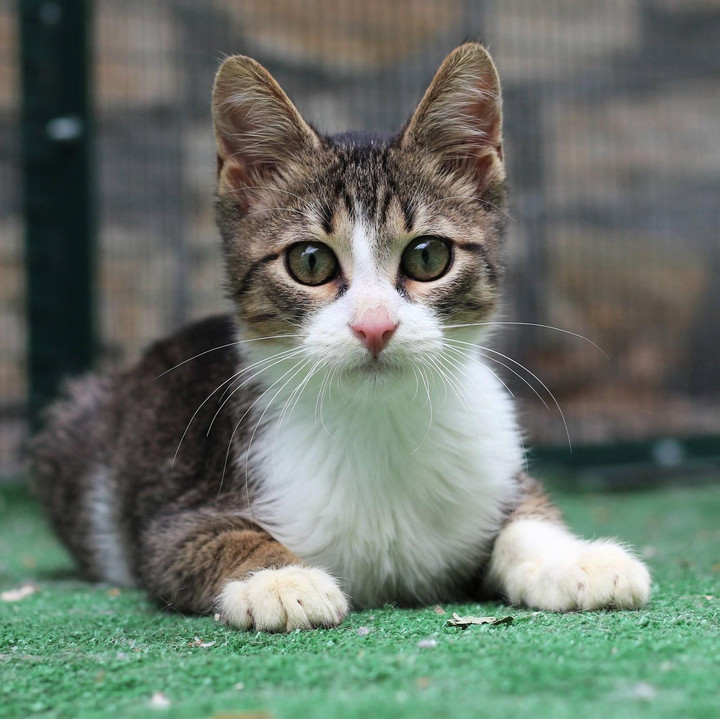

No objects detected.


In [26]:
# next detection

# Step 1 — Upload file
uploaded = files.upload()

# Step 2 — Loop through uploaded files
for filename in uploaded.keys():
    print(f"Predicting on file: {filename}")

    # Step 3 — Run prediction
    results = model.predict(source=filename, save=True, conf=0.25)

    # Step 4 — Show image
    results[0].show()  # Display annotated image inline

    # Step 5 — Print detected classes
    boxes = results[0].boxes
    if boxes is not None and len(boxes) > 0:
        class_ids = boxes.cls.tolist()
        class_names = [model.names[int(c)] for c in class_ids]
        print("Detected classes:", class_names)
    else:
        print("No objects detected.")

In [27]:
print(model.names)
print("Number of classes:", len(model.names))


{0: 'person'}
Number of classes: 1


In [28]:
# test on vedio
from google.colab import files
uploaded = files.upload()


Saving vedddd.mp4 to vedddd.mp4


In [30]:
# predict on vedio and save the result
results = model.predict(source="vedddd.mp4", save=True, conf=0.25, stream=True)


In [31]:
# count the number of person
person_count_total = 0

for result in results:
    boxes = result.boxes
    class_ids = boxes.cls.tolist()  # get class indices
    person_count = class_ids.count(0)  # assuming 0 = 'person'
    person_count_total += person_count

print(f"Total number of people detected (cumulative over all frames): {person_count_total}")



video 1/1 (frame 1/2073) /content/vedddd.mp4: 416x256 3 persons, 62.9ms
video 1/1 (frame 2/2073) /content/vedddd.mp4: 416x256 4 persons, 61.2ms
video 1/1 (frame 3/2073) /content/vedddd.mp4: 416x256 5 persons, 7.9ms
video 1/1 (frame 4/2073) /content/vedddd.mp4: 416x256 5 persons, 10.3ms
video 1/1 (frame 5/2073) /content/vedddd.mp4: 416x256 3 persons, 11.3ms
video 1/1 (frame 6/2073) /content/vedddd.mp4: 416x256 3 persons, 18.4ms
video 1/1 (frame 7/2073) /content/vedddd.mp4: 416x256 4 persons, 9.8ms
video 1/1 (frame 8/2073) /content/vedddd.mp4: 416x256 4 persons, 9.4ms
video 1/1 (frame 9/2073) /content/vedddd.mp4: 416x256 4 persons, 10.7ms
video 1/1 (frame 10/2073) /content/vedddd.mp4: 416x256 4 persons, 13.1ms
video 1/1 (frame 11/2073) /content/vedddd.mp4: 416x256 4 persons, 9.3ms
video 1/1 (frame 12/2073) /content/vedddd.mp4: 416x256 3 persons, 8.5ms
video 1/1 (frame 13/2073) /content/vedddd.mp4: 416x256 3 persons, 11.6ms
video 1/1 (frame 14/2073) /content/vedddd.mp4: 416x256 2 persons

In [38]:
# keep all unique track IDs for persons
unique_person_ids = set()

for result in results:
    boxes = result.boxes

    # Check if there are any detections
    if boxes is not None:
        class_ids = boxes.cls.tolist() if boxes.cls is not None else []
        track_ids = boxes.id.tolist() if boxes.id is not None else []

        for cls_id, track_id in zip(class_ids, track_ids):
            if cls_id == 0:  # assuming class 0 = 'person'
                unique_person_ids.add(track_id)

print(f"Number of distinct persons in the video: {len(unique_person_ids)}")



video 1/1 (frame 1/2073) /content/vedddd.mp4: 416x256 3 persons, 8.7ms
video 1/1 (frame 2/2073) /content/vedddd.mp4: 416x256 3 persons, 10.7ms
video 1/1 (frame 3/2073) /content/vedddd.mp4: 416x256 4 persons, 10.4ms
video 1/1 (frame 4/2073) /content/vedddd.mp4: 416x256 5 persons, 8.8ms
video 1/1 (frame 5/2073) /content/vedddd.mp4: 416x256 3 persons, 11.8ms
video 1/1 (frame 6/2073) /content/vedddd.mp4: 416x256 3 persons, 9.8ms
video 1/1 (frame 7/2073) /content/vedddd.mp4: 416x256 4 persons, 11.4ms
video 1/1 (frame 8/2073) /content/vedddd.mp4: 416x256 4 persons, 9.5ms
video 1/1 (frame 9/2073) /content/vedddd.mp4: 416x256 4 persons, 11.7ms
video 1/1 (frame 10/2073) /content/vedddd.mp4: 416x256 4 persons, 10.0ms
video 1/1 (frame 11/2073) /content/vedddd.mp4: 416x256 4 persons, 54.5ms
video 1/1 (frame 12/2073) /content/vedddd.mp4: 416x256 3 persons, 7.9ms
video 1/1 (frame 13/2073) /content/vedddd.mp4: 416x256 3 persons, 15.3ms
video 1/1 (frame 14/2073) /content/vedddd.mp4: 416x256 2 persons

In [52]:
# Track and store all frame results immediately
results = list(model.track(
    source="vedddd.mp4",
    conf=0.25,
    persist=True,
    save=True,
    stream=True
))



video 1/1 (frame 1/2073) /content/vedddd.mp4: 416x256 3 persons, 8.4ms
video 1/1 (frame 2/2073) /content/vedddd.mp4: 416x256 3 persons, 115.1ms
video 1/1 (frame 3/2073) /content/vedddd.mp4: 416x256 4 persons, 12.4ms
video 1/1 (frame 4/2073) /content/vedddd.mp4: 416x256 5 persons, 11.9ms
video 1/1 (frame 5/2073) /content/vedddd.mp4: 416x256 3 persons, 13.2ms
video 1/1 (frame 6/2073) /content/vedddd.mp4: 416x256 3 persons, 9.7ms
video 1/1 (frame 7/2073) /content/vedddd.mp4: 416x256 4 persons, 11.7ms
video 1/1 (frame 8/2073) /content/vedddd.mp4: 416x256 4 persons, 10.8ms
video 1/1 (frame 9/2073) /content/vedddd.mp4: 416x256 4 persons, 10.3ms
video 1/1 (frame 10/2073) /content/vedddd.mp4: 416x256 4 persons, 10.2ms
video 1/1 (frame 11/2073) /content/vedddd.mp4: 416x256 4 persons, 8.8ms
video 1/1 (frame 12/2073) /content/vedddd.mp4: 416x256 3 persons, 9.4ms
video 1/1 (frame 13/2073) /content/vedddd.mp4: 416x256 3 persons, 9.5ms
video 1/1 (frame 14/2073) /content/vedddd.mp4: 416x256 2 person

In [53]:
unique_ids = set()

for r in results:
    if r.boxes is not None:
        ids = r.boxes.id.tolist() if r.boxes.id is not None else []
        cls = r.boxes.cls.tolist() if r.boxes.cls is not None else []
        for track_id, cls_id in zip(ids, cls):
            if cls_id == 0:  # class 0 = person
                unique_ids.add(track_id)

print(f"Distinct persons: {len(unique_ids)}")


Distinct persons: 67


In [56]:
import os
import cv2

crop_base_dir = "crops"
os.makedirs(crop_base_dir, exist_ok=True)

saved_ids = set()
frame_index = 0

for result in results:
    frame = result.orig_img

    if frame is None:
        print(f"Frame {frame_index} is None, skipping.")
        frame_index += 1
        continue

    boxes = result.boxes

    if boxes is None:
        frame_index += 1
        continue

    xyxy = boxes.xyxy.cpu().numpy()
    class_ids = boxes.cls.cpu().numpy()
    track_ids = boxes.id.cpu().numpy() if boxes.id is not None else None

    for i, (coords, cls_id) in enumerate(zip(xyxy, class_ids)):
        if cls_id == 0:
            # Check if track_ids is not None before accessing
            if track_ids is not None:
                track_id = int(track_ids[i])

                # Save only one image per person
                if track_id not in saved_ids:
                    x1, y1, x2, y2 = coords.astype(int)

                    # clamp to image size
                    height, width = frame.shape[:2]
                    x1 = max(0, min(x1, width - 1))
                    x2 = max(0, min(x2, width - 1))
                    y1 = max(0, min(y1, height - 1))
                    y2 = max(0, min(y2, height - 1))

                    if x2 <= x1 or y2 <= y1:
                        print(f"⚠️ Skipped empty crop for ID {track_id}")
                        continue

                    cropped_person = frame[y1:y2, x1:x2]

                    if cropped_person.size == 0:
                        print(f"⚠️ Empty crop for ID {track_id}")
                        continue

                    person_folder = os.path.join(crop_base_dir, str(track_id))
                    os.makedirs(person_folder, exist_ok=True)

                    filename = os.path.join(person_folder, f"frame_{frame_index}.jpg")
                    success = cv2.imwrite(filename, cropped_person)

                    if success:
                        print(f"✅ Saved crop for ID {track_id} → {filename}")
                    else:
                        print(f"❌ Failed to save crop for ID {track_id}")

                    saved_ids.add(track_id)
            else:
                # Handle cases where there are detections but no track_ids (shouldn't happen with track command)
                print(f"Frame {frame_index}: Detections found but no track_ids.")


    frame_index += 1

print("✅ Done saving one crop per unique person!")

Frame 0: Detections found but no track_ids.
Frame 0: Detections found but no track_ids.
Frame 0: Detections found but no track_ids.
✅ Saved crop for ID 216 → crops/216/frame_1.jpg
✅ Saved crop for ID 217 → crops/217/frame_1.jpg
✅ Saved crop for ID 218 → crops/218/frame_1.jpg
✅ Saved crop for ID 219 → crops/219/frame_2.jpg
✅ Saved crop for ID 220 → crops/220/frame_3.jpg
✅ Saved crop for ID 223 → crops/223/frame_33.jpg
✅ Saved crop for ID 236 → crops/236/frame_68.jpg
Frame 89: Detections found but no track_ids.
Frame 90: Detections found but no track_ids.
Frame 91: Detections found but no track_ids.
Frame 91: Detections found but no track_ids.
✅ Saved crop for ID 239 → crops/239/frame_92.jpg
✅ Saved crop for ID 240 → crops/240/frame_92.jpg
✅ Saved crop for ID 242 → crops/242/frame_95.jpg
Frame 108: Detections found but no track_ids.
Frame 109: Detections found but no track_ids.
Frame 110: Detections found but no track_ids.
✅ Saved crop for ID 245 → crops/245/frame_111.jpg
✅ Saved crop fo

In [57]:
import os

print(os.listdir("crops"))


['330', '293', '217', '376', '286', '297', '223', '415', '216', '380', '385', '319', '326', '287', '421', '246', '366', '363', '313', '242', '315', '305', '323', '248', '245', '390', '328', '356', '258', '316', '298', '311', '314', '259', '327', '318', '422', '274', '220', '292', '350', '364', '312', '295', '240', '218', '372', '276', '247', '296', '254', 'test.jpg', '257', '419', '272', '294', '270', '309', '317', '290', '236', '335', '303', '239', '219', '374', '365', '269']


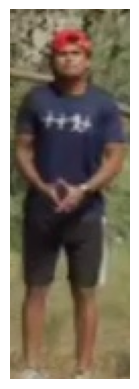

In [59]:
# display img crop
import cv2
import matplotlib.pyplot as plt
import os

folder_name = "216"
folder_path = os.path.join("crops", folder_name)

if os.path.exists(folder_path):
    images = os.listdir(folder_path)
    if images:
        img_path = os.path.join(folder_path, images[0])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis("off")
        plt.show()
    else:
        print(f"No images in crops/{folder_name}")
else:
    print(f"No folder crops/{folder_name}")
